TUGAS BESAR DATA MINING 

NAMA : SYA RAIHAN HEGGI 

NIM : 1301184219

KELAS : IF-41-GAB01

In [209]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [210]:
df_x = pd.read_csv("processed_train.csv",usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_y = pd.read_csv("processed_train.csv",usecols=['fraud'])

In [211]:
df_x.shape

(240, 4)

# SPLIT DATA 

In [212]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.30,random_state=5)

# ANN MODEL 

In [213]:
model = models.Sequential([
    layers.Dense(2000, input_dim=4, activation='relu'),
    layers.Dense(500, activation='sigmoid'),
    layers.Dense(500, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
6/6 [==============================] - 0s 8ms/step - loss: 0.9442 - accuracy: 0.5501
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.7050 - accuracy: 0.8644
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3674 - accuracy: 0.8806
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3087 - accuracy: 0.8993
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3134 - accuracy: 0.8809
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2864 - accuracy: 0.8588
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2887 - accuracy: 0.8655
Epoch 8/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2030 - accuracy: 0.9446
Epoch 9/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1655 - accuracy: 0.9233
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 0.1974 - accuracy: 0.9092


## BUAT PREDIKSI 

In [214]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

## DATA TRAINING 

In [215]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[148   0]
 [ 14   6]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       148
           1       1.00      0.30      0.46        20

    accuracy                           0.92       168
   macro avg       0.96      0.65      0.71       168
weighted avg       0.92      0.92      0.90       168

Accuracy: 91.66666666666666


## DATA TESTING

In [216]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[65  1]
 [ 5  1]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.50      0.17      0.25         6

    accuracy                           0.92        72
   macro avg       0.71      0.58      0.60        72
weighted avg       0.89      0.92      0.90        72

Accuracy: 91.66666666666666


# LOAD DATASET TEST

In [217]:
df_test = pd.read_csv("test.csv", sep="|", usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_realclass = pd.read_csv("DMC-2019-realclass.csv")
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids
0,4,467,88.48,4
1,3,1004,58.99,7
2,1,162,14.00,4
3,5,532,84.79,9
4,5,890,42.16,4


In [218]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
d = normalize.fit_transform(df_test[df_test.columns[:9]])
df_test = pd.DataFrame(d, columns=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])

In [219]:
y_pred_testing = model.predict(df_test)

# EVALUATION 

In [220]:
warnings.filterwarnings('ignore')
y_pred_testing = [np.argmax(element) for element in y_pred_testing]
print(confusion_matrix(df_realclass, y_pred_testing))
print(classification_report(df_realclass, y_pred_testing))
print("Accuracy:",accuracy_score(df_realclass, y_pred_testing)*100)

[[452650  21744]
 [ 13424  10303]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    474394
           1       0.32      0.43      0.37     23727

    accuracy                           0.93    498121
   macro avg       0.65      0.69      0.67    498121
weighted avg       0.94      0.93      0.93    498121

Accuracy: 92.93986802403433


# VISUALIZE 

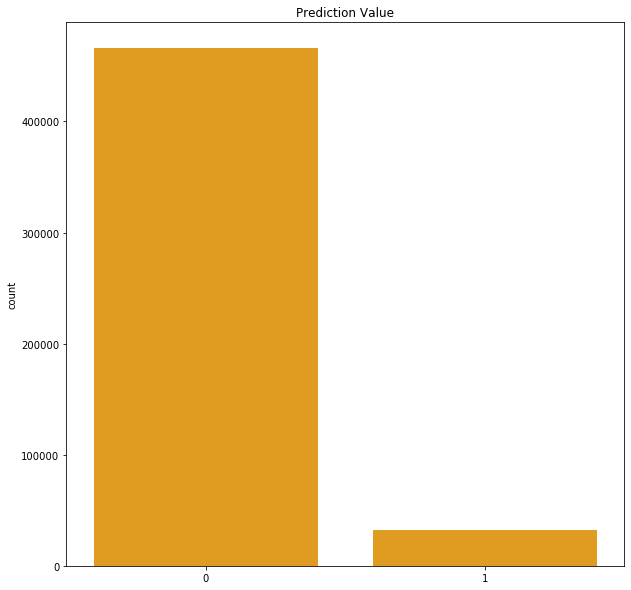

In [221]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Real Value")
sn.histplot(df_realclass)
plt.subplot(1,2,2)
plt.title("Prediction Value")
sn.histplot(y_pred_testing, color="orange")

# PREPARE RESULT 


In [222]:
df_test = pd.read_csv("test.csv",sep="|")
df_test["fraud"] = pd.DataFrame(y_pred_testing)
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,0
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,0


# INTERPRETATION 

In [223]:
color=['blue','orange']
data = df_test.sample(n=20000)
data.loc[data['fraud']== 0 ,'color'] = "blue"
data.loc[data['fraud']== 1 ,'color'] = "red"

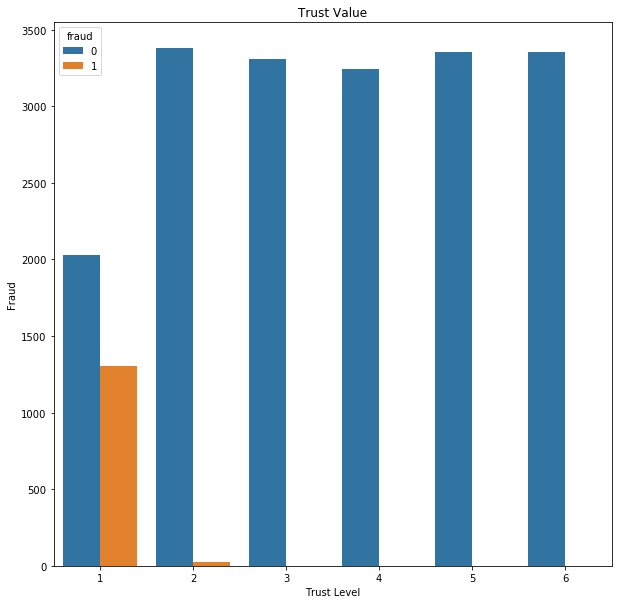

In [224]:
plt.figure(figsize=(10,10))
plt.title("Trust Value")
sn.countplot(x=data["trustLevel"], hue=data["fraud"], data=data)
plt.xlabel('Trust Level')
plt.ylabel('Fraud')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title("totalScanTimeInSecond")
sn.countplot(x=data["totalScanTimeInSeconds"], hue=data["fraud"], data=data)
plt.xlabel('totalScanTimeInSecond')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Grand Total")
sn.countplot(x=data["grandTotal"], hue=data["fraud"], data=data)
plt.xlabel('Grand Total')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Line Item Voids")
sn.countplot(x=data["lineItemVoids"], hue=data["fraud"], data=data)
plt.xlabel('Line Item Voids')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("scansWithoutRegistration")
sn.countplot(x=data["scansWithoutRegistration"], hue=data["fraud"], data=data)
plt.xlabel('scansWithoutRegistration')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("quantityModifications")
sn.countplot(x=data["quantityModifications"], hue=data["fraud"], data=data)
plt.xlabel('quantityModifications')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("scannedLineItemsPerSecond")
sn.countplot(x=data["scannedLineItemsPerSecond"], hue=data["fraud"], data=data)
plt.xlabel('scannedLineItemsPerSecond')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("valuePerSecond")
sn.countplot(x=data["valuePerSecond"], hue=data["fraud"], data=data)
plt.xlabel('valuePerSecond')
plt.ylabel('Fraud')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.title("lineItemVoidsPerPosition")
sn.countplot(x=data["lineItemVoidsPerPosition"], hue=data["fraud"], data=data)
plt.xlabel('lineItemVoidsPerPosition')
plt.ylabel('Fraud')
plt.show()


# SAVE DATA

In [225]:
df_test.to_csv("Final_Prediction_ANN.csv")